In [1]:
import numpy as np
import model
import function as F
import optimizer as opt
import os

In [2]:
train_data, valid_data=F.train_data_loader()
test_data=F.test_data_loader()

In [3]:
os.getcwd()

'/Users/kawamura/drei_experiment/PFN-intern'

In [4]:
INF=1e7
#ハイパーパラメーター
batch_size=10
D=8
epoch_num=100

#lossとかaccuracyとかの記録
stat_dict={"train_acc":[], "val_acc":[], "epoch_loss":[], "loss_list":[]}
best_acc=0

#modelとoptimizerの設定
gnn=model.GNN(D)
optimizer=opt.MomentumSGD()

#学習
for i in range(epoch_num):
    train_range=np.arange(len(train_data))
    epoch_loss=[]
    while(True): #epoch開始
        if np.all(train_range==INF): #epoch終了条件
            train_acc=F.get_accuracy(train_data, gnn)
            val_acc=F.get_accuracy(valid_data, gnn)
            stat_dict["train_acc"].append(train_acc)
            stat_dict["val_acc"].append(val_acc)
            stat_dict["epoch_loss"].append(sum(epoch_loss)/len(epoch_loss))
            #今までで一番accuracyの高かったモデルをセーブ
            if val_acc>best_acc:
                best_acc=val_acc
                gnn.save(model_name="best_model_MomentmSGD")
            print("-"*10)
            print("train accuracy:", train_acc)
            print("val accuracy:", val_acc)
            print("epoch loss average:", sum(epoch_loss)/len(epoch_loss))
            print(i, "epoch finish!")
            break
        
        #indexをINTでないtrain_range内の要素からbatch size分選択し、選択したindexはINFにする。全ての要素がINFになったらepoch終了
        indexs=list(np.random.choice(train_range[train_range!=INF], batch_size, replace=False))
        train_range[indexs]=INF
        
        #1batch分の学習
        tmp_loss=0
        for idx in indexs:
            D, adj, y=train_data[idx]
 
            grads=gnn.numerical_gradient(adj, y)
            params=gnn.theta
            optimizer.update(params, grads)
        
            tmp_loss+=gnn.loss(adj, y)
        epoch_loss.append(tmp_loss/batch_size)
        stat_dict["loss_list"].append(tmp_loss/batch_size)
        
print()
print("#"*10)
print("best accuracy:", best_acc)
print("#"*10)

----------
train accuracy: 0.50125
val accuracy: 0.5025
epoch loss average: [1.02619659]
0 epoch finish!
----------
train accuracy: 0.528125
val accuracy: 0.565
epoch loss average: [0.70950751]
1 epoch finish!
----------
train accuracy: 0.526875
val accuracy: 0.55
epoch loss average: [0.6886709]
2 epoch finish!
----------
train accuracy: 0.521875
val accuracy: 0.5725
epoch loss average: [0.68222634]
3 epoch finish!
----------
train accuracy: 0.53125
val accuracy: 0.5825
epoch loss average: [0.67818894]
4 epoch finish!
----------
train accuracy: 0.54125
val accuracy: 0.5925
epoch loss average: [0.67469139]
5 epoch finish!
----------
train accuracy: 0.556875
val accuracy: 0.61
epoch loss average: [0.67104362]
6 epoch finish!
----------
train accuracy: 0.566875
val accuracy: 0.6225
epoch loss average: [0.66801915]
7 epoch finish!
----------
train accuracy: 0.5775
val accuracy: 0.625
epoch loss average: [0.66552408]
8 epoch finish!
----------
train accuracy: 0.57375
val accuracy: 0.6325
ep

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0.92, 'optimizer: MomentumSGD')

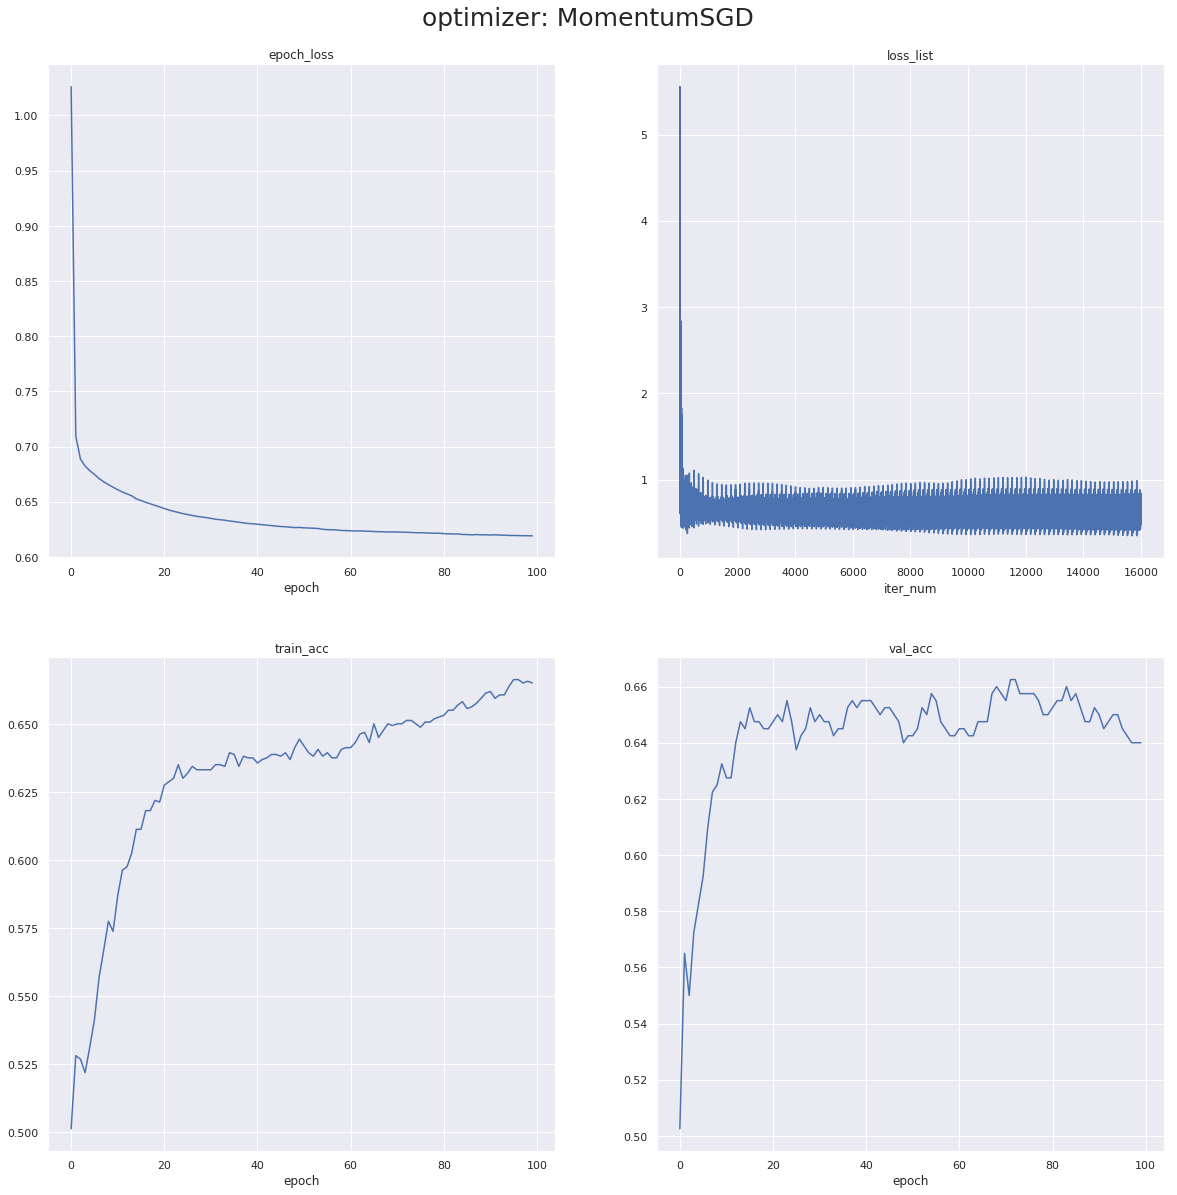

In [7]:
sns.set()
fig=plt.figure(figsize=(20,20))

for i, (k,v) in enumerate(sorted(stat_dict.items())):
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(np.arange(len(v)), v)
    ax.set_title(k)
    if k!="loss_list":
        ax.set_xlabel("epoch")
    else:
        ax.set_xlabel("iter_num")
fig.suptitle("optimizer: MomentumSGD", fontsize=25, x=0.5, y=0.92)   

In [10]:
for k,v in stat_dict.items():
    print(k)
    v=np.array(v)

np.savez_compressed("MomentumSGD_stat.npz", 
                   epoch_loss=stat_dict["epoch_loss"], 
                   loss_list=stat_dict["loss_list"], 
                  val_acc=stat_dict["val_acc"],
                  train_acc=stat_dict["train_acc"])

loss_list
epoch_loss
train_acc
val_acc
